In [1]:
import random
import timeit
import matplotlib.pyplot as plt
import math

# Hashing

This week we investigated hashing, including four methods of resolving collisions - Linear Probing, Quadratic Probing, Chaining and Double Hashing. This practical will ask you to compare and contrast various hash functions as well as each of the collision resolution methods.

## Hash Functions
A good hash function meets three standards
* Is easy and fast to compute (O(1))
* Uses the whole hash table.
* Distributes the data as evenly as possible

We will use a hash table with linear probing to test and analyse the four different hash functions below.

In [2]:
def hashfunction1(key,size):
    return key%size

def hashfunction2(key,size):
    if key < size:
        return key
    else:
        return key%10
    
def hashfunction3(key,size):
    return key%2

def hashfunction4(key,size):
    val = 0
    for i in range(key):
        val += i
    return val%size

The below code creates a class for a hash table with linear probing. We have given it an arbitrary size of 30671 (a prime).

We insert data into the table via the function: *put(key,val)*

We search for a key with the function: *get(key)*

We change the hashfunction with the function: *sethashfunction(function)*

## Hash function timing investigation

We will now investigate how each of these hash functions perform on the same set of data

In [3]:
class LinearHashTable:
    def __init__(self):
        self.size = 30671
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots))
        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data  #replace
            else:
                nextslot = self.rehash(hashvalue,len(self.slots))
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot,len(self.slots))
                if self.slots[nextslot] == None:
                    self.slots[nextslot]=key
                    self.data[nextslot]=data
                elif self.slots[nextslot] == key:
                    self.data[nextslot] = data #replace

    def hashfunction(self,key,size):
         return key%size

    def rehash(self,oldhash,size):
        return (oldhash+1)%size

    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))

        data = None
        stop = False
        found = False
        position = startslot
        while self.slots[position] != None and not found and not stop:
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position=self.rehash(position,len(self.slots))
                if position == startslot:
                    stop = True
        return data
    
    def sethashfunction(self,hashfunction):
        self.hashfunction = hashfunction

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)


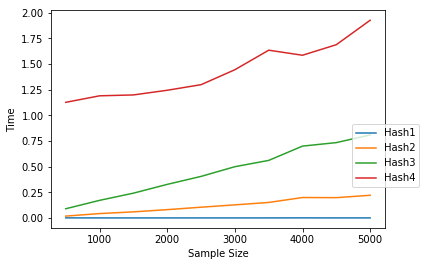

In [4]:
def generateRandomData():
    numSamples = 30000
    data = []
    for i in range(numSamples):
        data.append(random.randint(1,30671*2))
    return data

def testHashFunctions(data):
    hash1times = []
    hash2times = []
    hash3times = []
    hash4times = []
    xVals = []  
    for i in range (500,5001,500):
        #print(i)
        xVals.append(i)
        H = LinearHashTable()
        startTime = timeit.default_timer()
        for j in range(i):
            H.put(data[j],j)
        endTime = timeit.default_timer()
        
        hash1times.append((endTime - startTime)/i*1000)
    
        H = LinearHashTable()
        H.sethashfunction(hashfunction2)
        startTime = timeit.default_timer()
        for j in range(i):
            H.put(data[j],j)
        endTime = timeit.default_timer()
        hash2times.append((endTime - startTime)/i*1000)   
        
        H = LinearHashTable()
        H.sethashfunction(hashfunction3)
        startTime = timeit.default_timer()
        for j in range(i):
            H.put(data[j],j)
        endTime = timeit.default_timer()
        hash3times.append((endTime - startTime)/i*1000)    
        
        H = LinearHashTable()
        H.sethashfunction(hashfunction4)
        startTime = timeit.default_timer()
        for j in range(i):
            H.put(data[j],j)
        endTime = timeit.default_timer()
        hash4times.append((endTime - startTime)/i*1000)    

    plt.plot(xVals,hash1times, label="Hash1")
    plt.plot(xVals,hash2times, label="Hash2")
    plt.plot(xVals,hash3times, label="Hash3")
    plt.plot(xVals,hash4times, label="Hash4")
    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()
    
testHashFunctions(generateRandomData())

###  Reflect  on the performance of the 4 hashing functions we have used. Why are they good or bad?

### 3. If we have knowledge about our keys we can design better hash functions. Give an example of a hash function that would perform better than *hashfunction1()* if all keys are divisible by five.

In [ ]:
def betterHashFunction(key, size):
    return #Your answer here
    

### 4. Based on the 'testHashFunctions' and 'generateRandomData' functions given above, write code for 'testMyHashFunction' and 'generateEvenRandomData' functions to compare the performance of your designed hash fucntion with hashfunction1() on keys divisible by 5.

In [7]:
def generateEvenRandomData():
    #Your answer here
    return
    
    
    
def testMyHashFunction():
    #Your answer here
    return
    
    

### 5. Compare and contrast the performance of your hashing function with hashfunction1().


answer

## Collision Resolution 

The previous examples all made use of linear probing to resolve collisions in the hash table. We also investigated **Quadratic Probing, Chaining, and Double Hashing** as other methods.

Each of these methods is outlined in a class below.

### Quadratic Probing

In [8]:
class QuadraticHashTable:
    def __init__(self):
        self.size = 30671
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self,key,data):
        probes = 0
        hashvalue = self.hashfunction(key,len(self.slots))

        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data  #replace
            else:
                nextslot = self.rehash(hashvalue,len(self.slots),probes)
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    probes += 1
                    nextslot = self.rehash(nextslot,len(self.slots),probes)
                if self.slots[nextslot] == None:
                    self.slots[nextslot]=key
                    self.data[nextslot]=data
                elif self.slots[nextslot] == key:
                    self.data[nextslot] = data #replace

    def hashfunction(self,key,size):
         return key%size

    def rehash(self,key,size,probes):
        return (self.hashfunction(key,size)+probes**2)%size

    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))

        data = None
        stop = False
        found = False
        position = startslot
        probes = 0
        while self.slots[position] != None and not found and not stop:
            probes += 1
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position=self.rehash(position,len(self.slots),probes)
                if position == startslot:
                    stop = True
        return data
    
    def sethashfunction(self,hashfunction):
        self.hashfunction = hashfunction

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)

### Chaining

## class ChainingHashTable:
    def __init__(self):
        self.size = 30671
        self.slots = []
        self.data = []
        for i in range(self.size):
            self.slots.append([])
            self.data.append([])

    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots))
        keyList = self.slots[hashvalue]
        inserted = False
        
        for i in range(len(keyList)):
            if keyList[i] == key:
                self.data[hashvalue][i] = data
                inserted = True
       
        if not inserted:
            keyList.append(key)
            self.data[hashvalue].append(data)


    def hashfunction(self,key,size):
         return key%size

    def rehash(self,key,size,probes):
        return (self.hashfunction(key,size)+probes**2)%size

    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))

        data = None
        stop = False
        found = False
        keyList = self.slots[startslot]
        
        for i in range(len(keyList)):
            if keyList[i] == key:
                data = self.data[startslot][i]
                break;   
        return data
    
    def sethashfunction(self,hashfunction):
        self.hashfunction = hashfunction

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)
        

### Double Hashing

In [10]:
class DoubleHashTable:
    def __init__(self):
        self.size = 30671
        self.prime = 27743
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self,key,data):
        probes = 0
        hashvalue = self.hashfunction(key,len(self.slots))

        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data  #replace
            else:
                probes += 1
                nextslot = self.rehash(key,len(self.slots),probes)
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    probes += 1
                    nextslot = self.rehash(key,len(self.slots),probes)
                if self.slots[nextslot] == None:
                    self.slots[nextslot]=key
                    self.data[nextslot]=data
                elif self.slots[nextslot] == key:
                    self.data[nextslot] = data #replace
        

    def hashfunction(self,key,size):
        return key%size
    
    def hashfunction2(self,key,prime):
        return prime-(key%prime)

    def rehash(self,key,size,probes):
        return (self.hashfunction(key,size)+probes*self.hashfunction2(key,self.prime))%size

    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))

        data = None
        stop = False
        found = False
        position = startslot
        probes = 0
        while self.slots[position] != None and not found and not stop:
            probes += 1
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position=self.rehash(position,len(self.slots),probes)
                if position == startslot:
                    stop = True
        return data
    
    def sethashfunction(self,hashfunction):
        self.hashfunction = hashfunction

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)

## Analysis

The method below compares each of the algorithms perfomance on the same dataset.

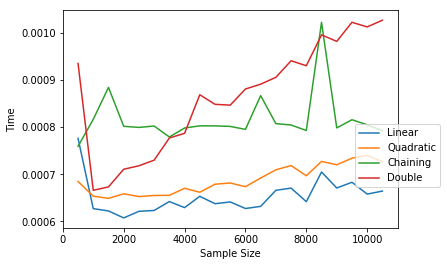

In [12]:
def generateRandomData():
    numSamples = 30000
    data = []
    for i in range(numSamples):
        data.append(random.randint(1,30671*2))
    return data

def testCollisions(data):
    lineartimes = []
    quadratictimes = []
    chainingtimes = []
    doubletimes = []
    xVals = []  
    for i in range (500,10501,500):
        xVals.append(i)
        H = LinearHashTable()
        for j in range(i):
            H.put(data[j],j)
        startTime = timeit.default_timer()
        for j in range(i):
            H.get(data[j])
        endTime = timeit.default_timer()
        lineartimes.append((endTime - startTime)/i*1000)

        H = QuadraticHashTable()
        for j in range(i):
            H.put(data[j],j)
        startTime = timeit.default_timer()
        for j in range(i):
            H.get(data[j])
        endTime = timeit.default_timer()
        quadratictimes.append((endTime - startTime)/i*1000)   

        H = ChainingHashTable()
        for j in range(i):
            H.put(data[j],j)
        startTime = timeit.default_timer()
        for j in range(i):
            H.get(data[j])
        endTime = timeit.default_timer()
        chainingtimes.append((endTime - startTime)/i*1000)    

        H = DoubleHashTable()
        for j in range(i):
            H.put(data[j],j)
        startTime = timeit.default_timer()
        for j in range(i):
            H.get(data[j])
        endTime = timeit.default_timer()
        doubletimes.append((endTime - startTime)/i*1000)    

    plt.plot(xVals,lineartimes, label="Linear")
    plt.plot(xVals,quadratictimes, label="Quadratic")
    plt.plot(xVals,chainingtimes, label="Chaining")
    plt.plot(xVals,doubletimes, label="Double")
    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()
    
testCollisions(generateRandomData())

### 6. Why do each of the algorithms perform similarly in this test?

Answer

## Lets run the same test with a poor hash function

We can run the test again with a poor hash function to see some other results!

500
1000
1500
2000
2500


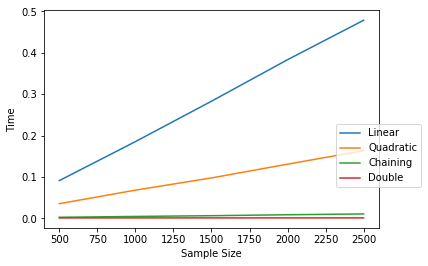

In [13]:
def badhash(key, size):
    return key%5

def testBadCollisions(data):
    lineartimes = []
    quadratictimes = []
    chainingtimes = []
    doubletimes = []
    xVals = []  
    for i in range (500,2501,500):
        #print(i)
        xVals.append(i)
        H = LinearHashTable()
        H.sethashfunction(badhash)
        for j in range(i):
            H.put(data[j],j)
        startTime = timeit.default_timer()
        for j in range(i):
            H.get(data[j])
        endTime = timeit.default_timer()
        lineartimes.append((endTime - startTime)/i*1000)

        H = QuadraticHashTable()
        H.sethashfunction(badhash)
        for j in range(i):
            H.put(data[j],j)
        startTime = timeit.default_timer()
        for j in range(i):
            H.get(data[j])
        endTime = timeit.default_timer()
        quadratictimes.append((endTime - startTime)/i*1000)   

        H = ChainingHashTable()
        H.sethashfunction(badhash)
        for j in range(i):
            H.put(data[j],j)
        startTime = timeit.default_timer()
        for j in range(i):
            H.get(data[j])
        endTime = timeit.default_timer()
        chainingtimes.append((endTime - startTime)/i*1000)

        H = DoubleHashTable()
        H.sethashfunction(badhash)
        for j in range(i):
            H.put(data[j],j)
        startTime = timeit.default_timer()
        for j in range(i):
            H.get(data[j])
        endTime = timeit.default_timer()
        doubletimes.append((endTime - startTime)/i*1000)    

    plt.plot(xVals,lineartimes, label="Linear")
    plt.plot(xVals,quadratictimes, label="Quadratic")
    plt.plot(xVals,chainingtimes, label="Chaining")
    plt.plot(xVals,doubletimes, label="Double")
    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()
    
testBadCollisions(generateRandomData())


### 7. Compare and contrast each of the collision resolution methods with the above hash function

Answer